#### Nathan 2021 PBMC abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Nathan 2021 data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230306**

### Load required modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [10]:
%matplotlib inline

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')


-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonschema          4.17.3
jupyter_events      0.6.3
ju

### Read datasets

In [4]:
adata = sc.read_h5ad('/Users/mairi.mcclean/example_data_lake/INBOX/tb_cc/raw_data_objects/human/nathan2021/Nathan2021_Lung_TB_T_Cells_CITESEQ_RNA.h5ad')
adata

AnnData object with n_obs × n_vars = 500089 × 33538
    obs: 'cell_id', 'nUMI', 'nGene', 'percent_mito', 'batch', 'TB_status', 'UMAP_1', 'UMAP_2', 'cluster_name', 'cluster_ids', 'donor'

### Make names unique

In [5]:
adata.var_names_make_unique()
sample_object = adata.copy()
sample_object

AnnData object with n_obs × n_vars = 500089 × 33538
    obs: 'cell_id', 'nUMI', 'nGene', 'percent_mito', 'batch', 'TB_status', 'UMAP_1', 'UMAP_2', 'cluster_name', 'cluster_ids', 'donor'

In [6]:
sample_object.shape


(500089, 33538)

In [7]:
sample_object.var

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.4, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, AL669831.5, FAM87B, LINC00115, FAM41C, AL645608.7, AL645608.3, AL645608.5, AL645608.1, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.8, HES4, ISG15, AL645608.2, AGRN, AL645608.9, RNF223, C1orf159, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20, AL391244.3, ANKRD65, AL391244.2, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, MORN1, RER1, PEX10, PLCH2, AL139246.1, AL139246.4, PANK4, HES5, ...]

[33538 rows x 0 columns]

In [8]:
sample_object.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:06)


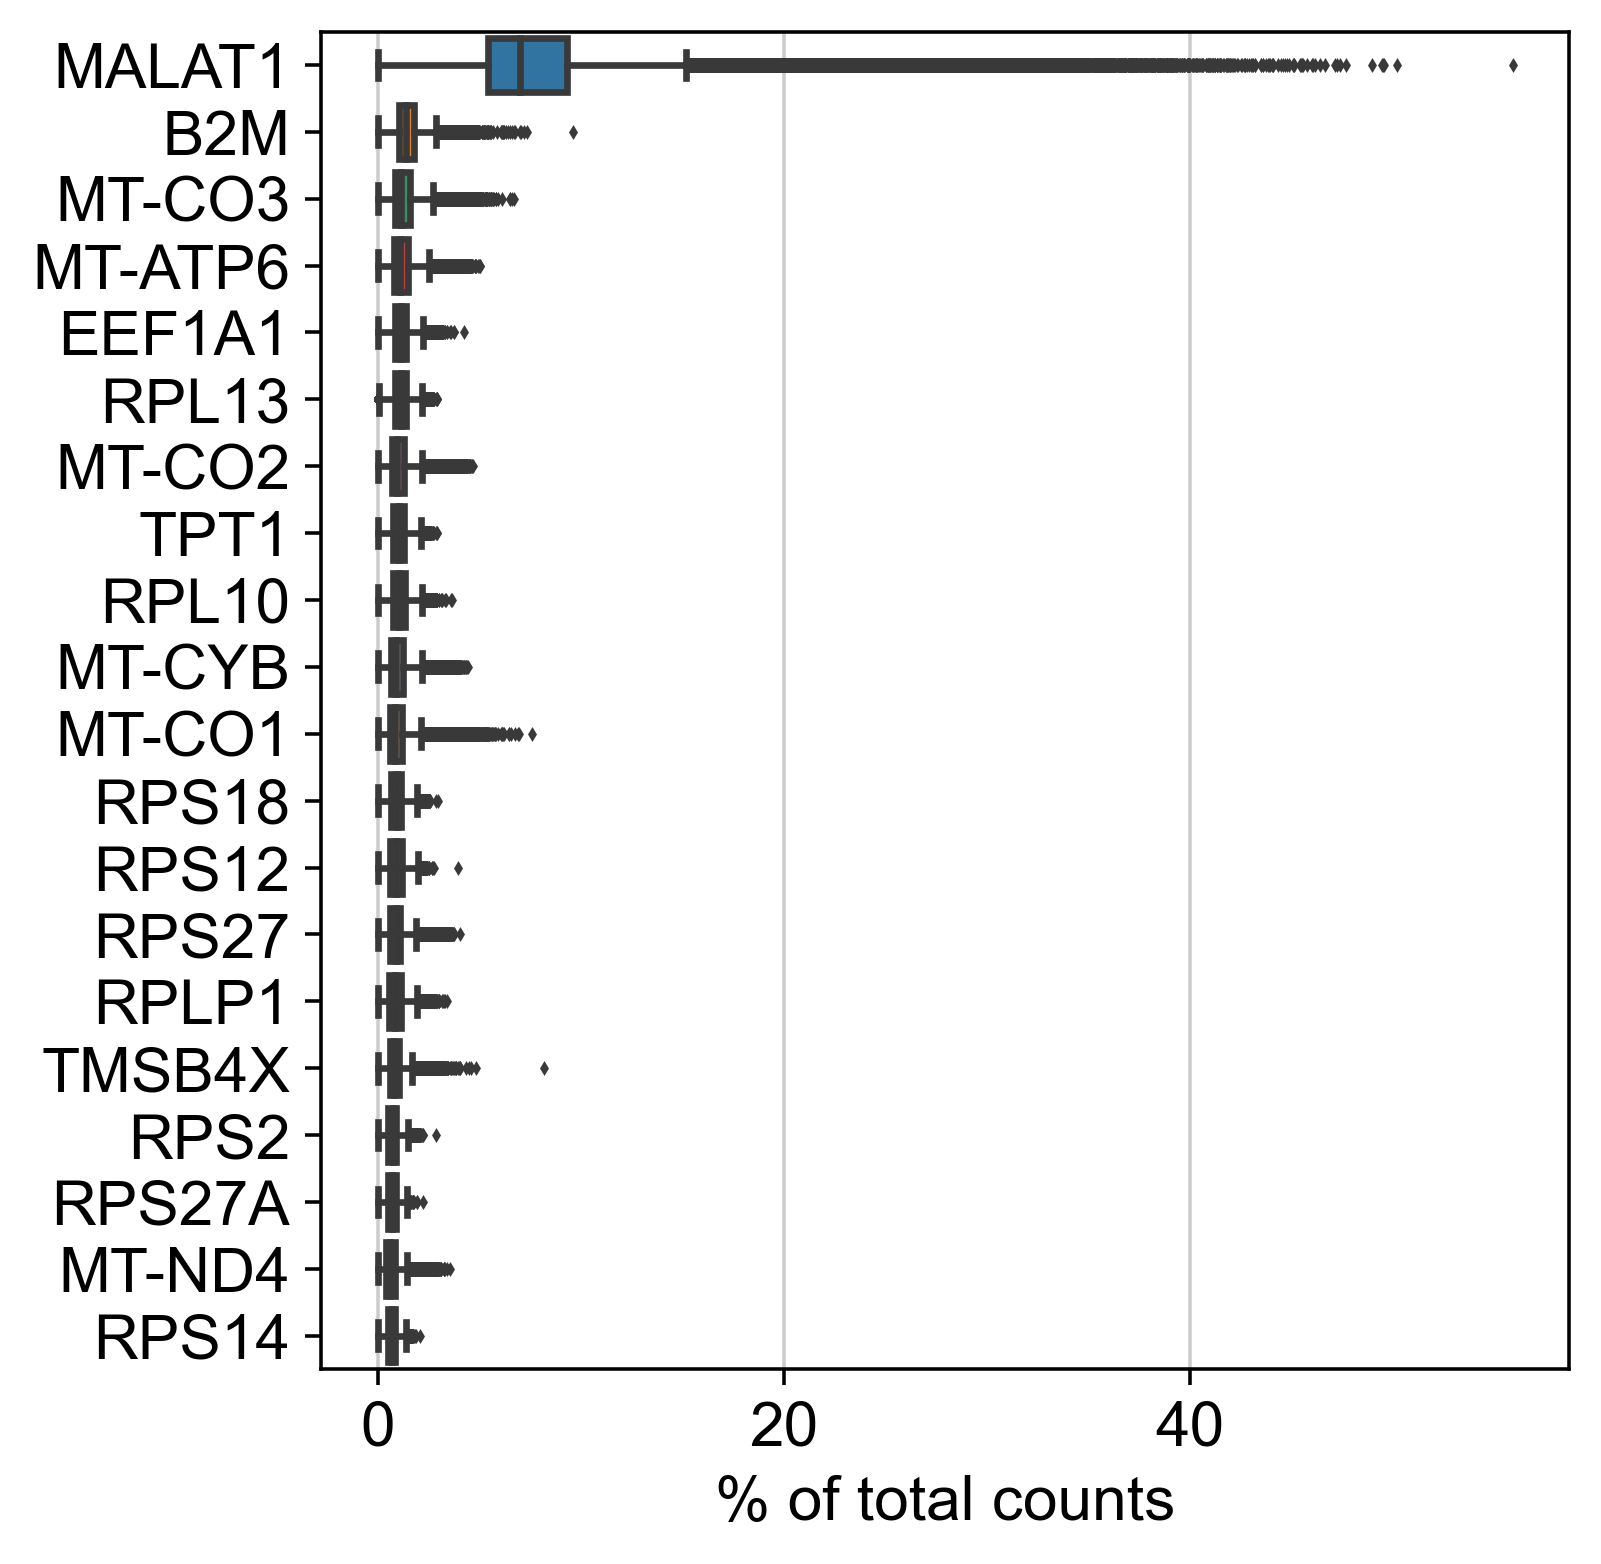

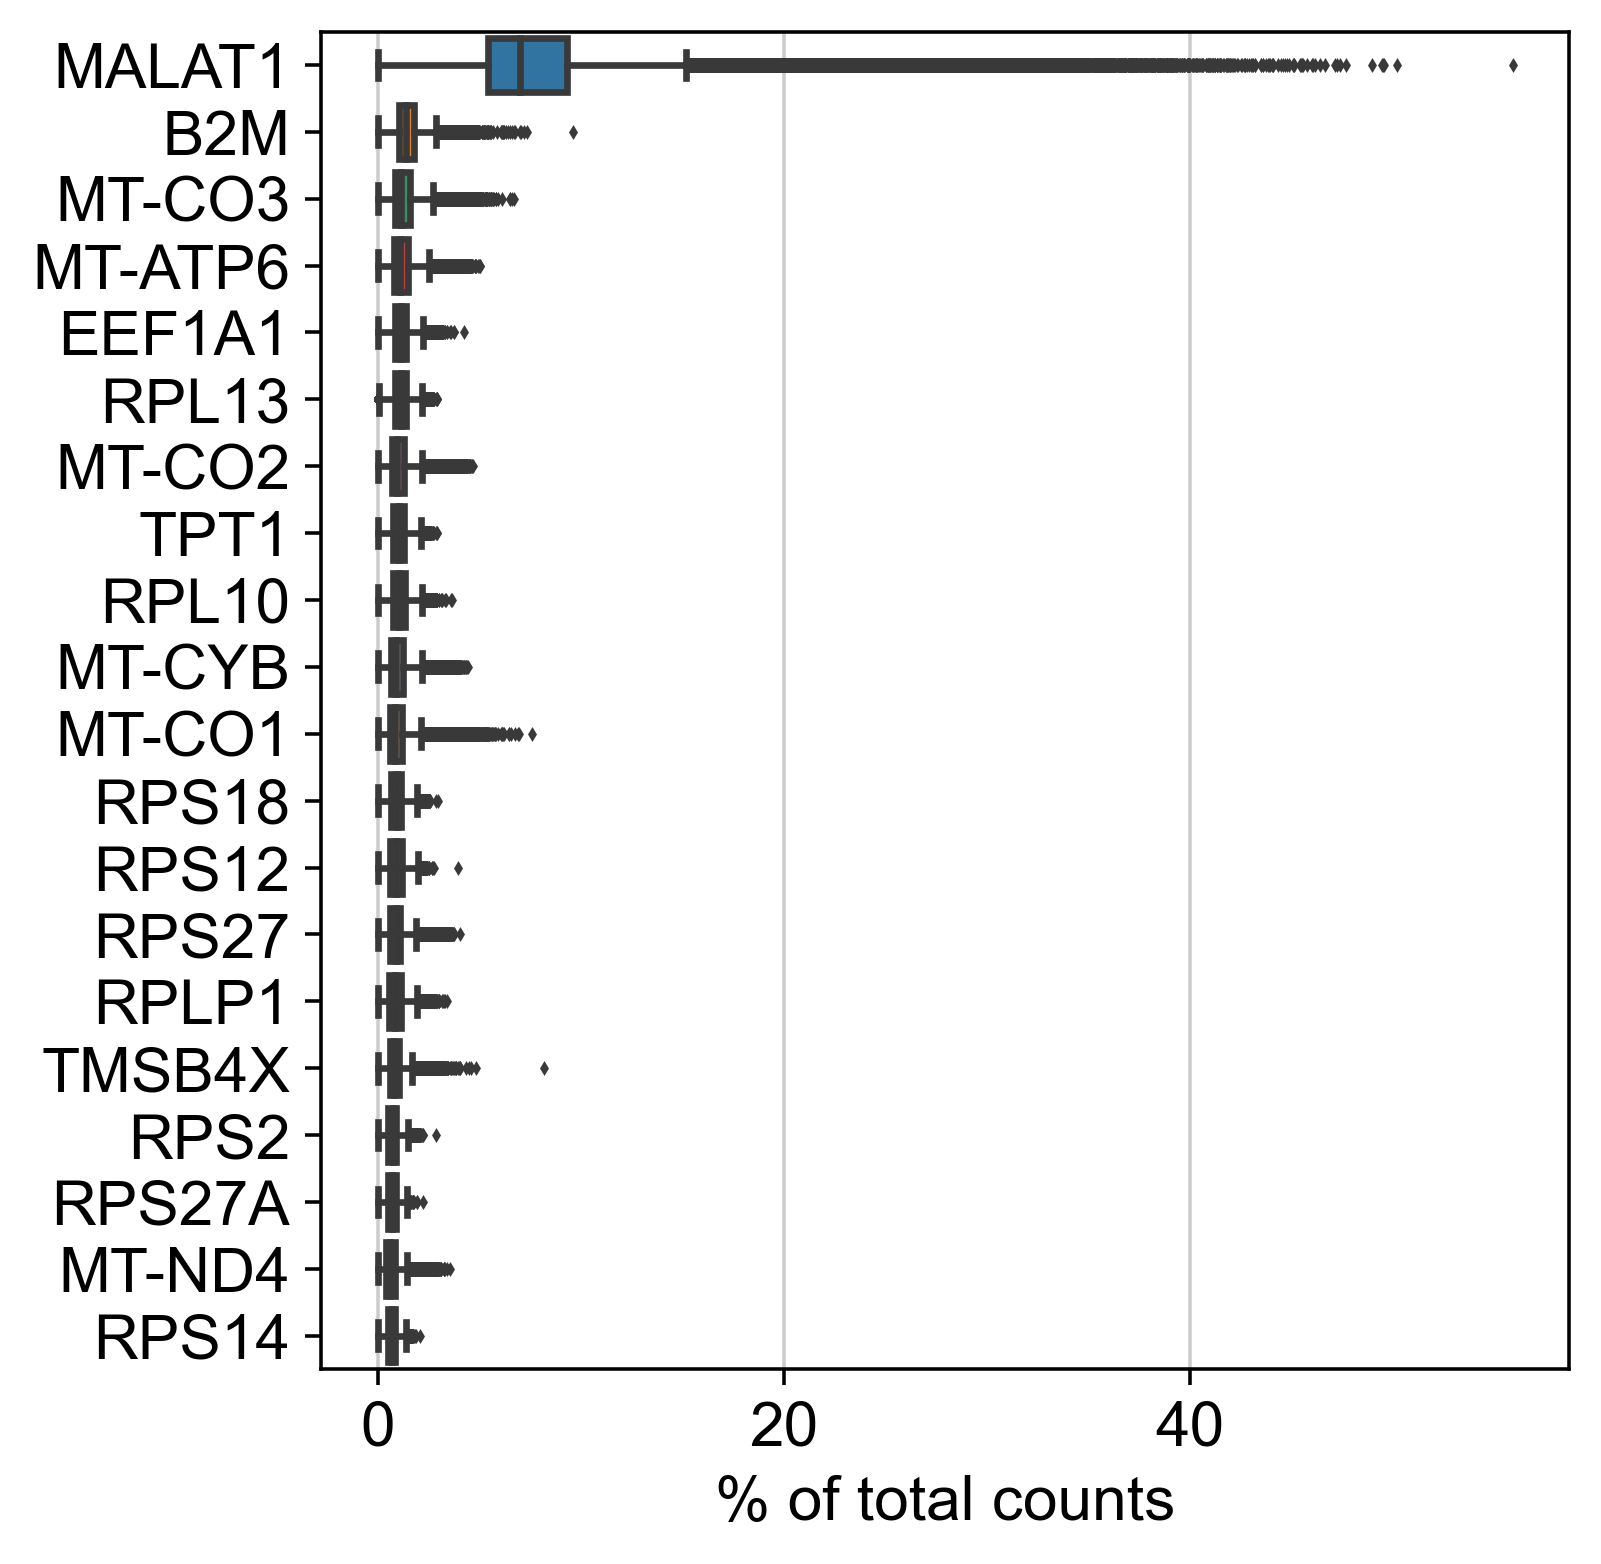

In [11]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Initial filtering

- By gene

In [12]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

500089 33538


- By cell

In [13]:
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 9538 genes that are detected in less than 3 cells


(500089, 24000)

### QC metrics

In [14]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-') 
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^HB[^(P)]"))
sample_object.var

n_cells     mt   ribo     hb
AL627309.1      851  False  False  False
AL627309.3       45  False  False  False
AL627309.4        4  False  False  False
AL669831.2       13  False  False  False
AL669831.5    12230  False  False  False
...             ...    ...    ...    ...
AC007325.4     4481  False  False  False
AL354822.1     3562  False  False  False
AC004556.1    29740  False  False  False
AC233755.2        3  False  False  False
AC240274.1     6301  False  False  False

[24000 rows x 4 columns]

- Check values present in new columns

In [15]:
sample_object.var['mt'].value_counts()

mt
False    23987
True        13
Name: count, dtype: int64

In [16]:
sample_object.var['ribo'].value_counts()

ribo
False    23897
True       103
Name: count, dtype: int64

In [17]:
sample_object.var['hb'].value_counts()

hb
False    23989
True        11
Name: count, dtype: int64

In [18]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt'], percent_top = None, log1p = False, inplace = True)

### Visualise QC metrics

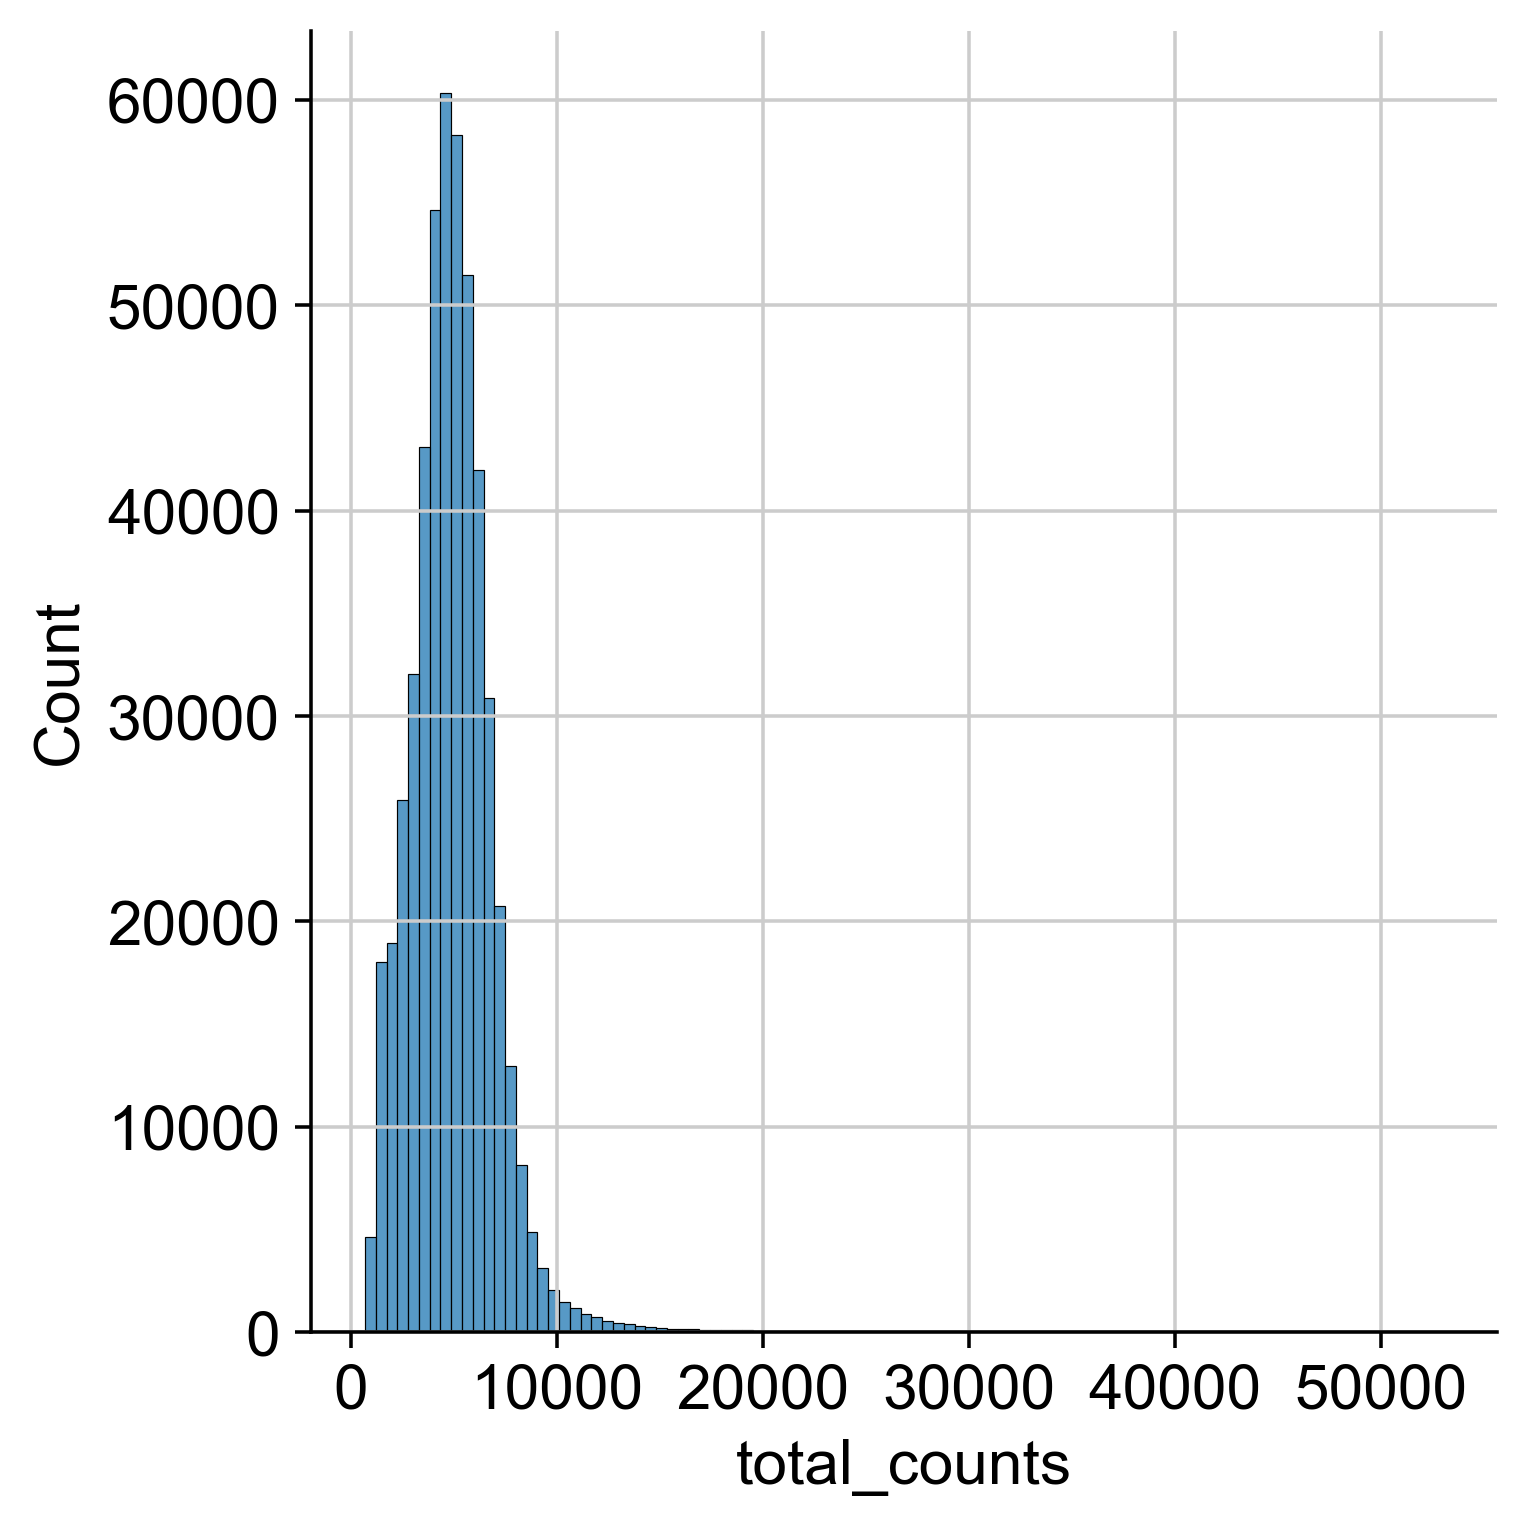

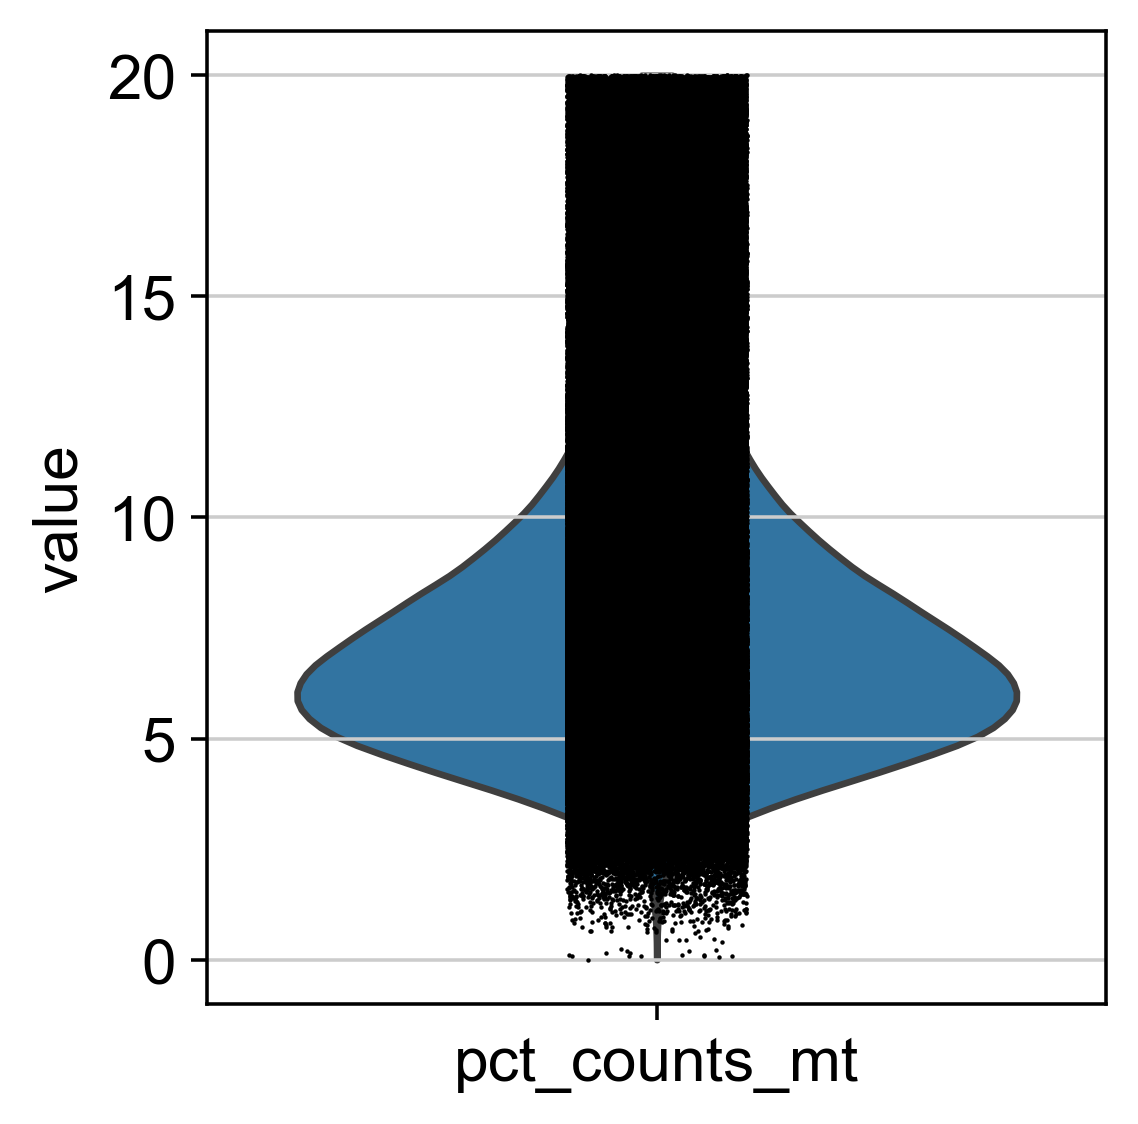

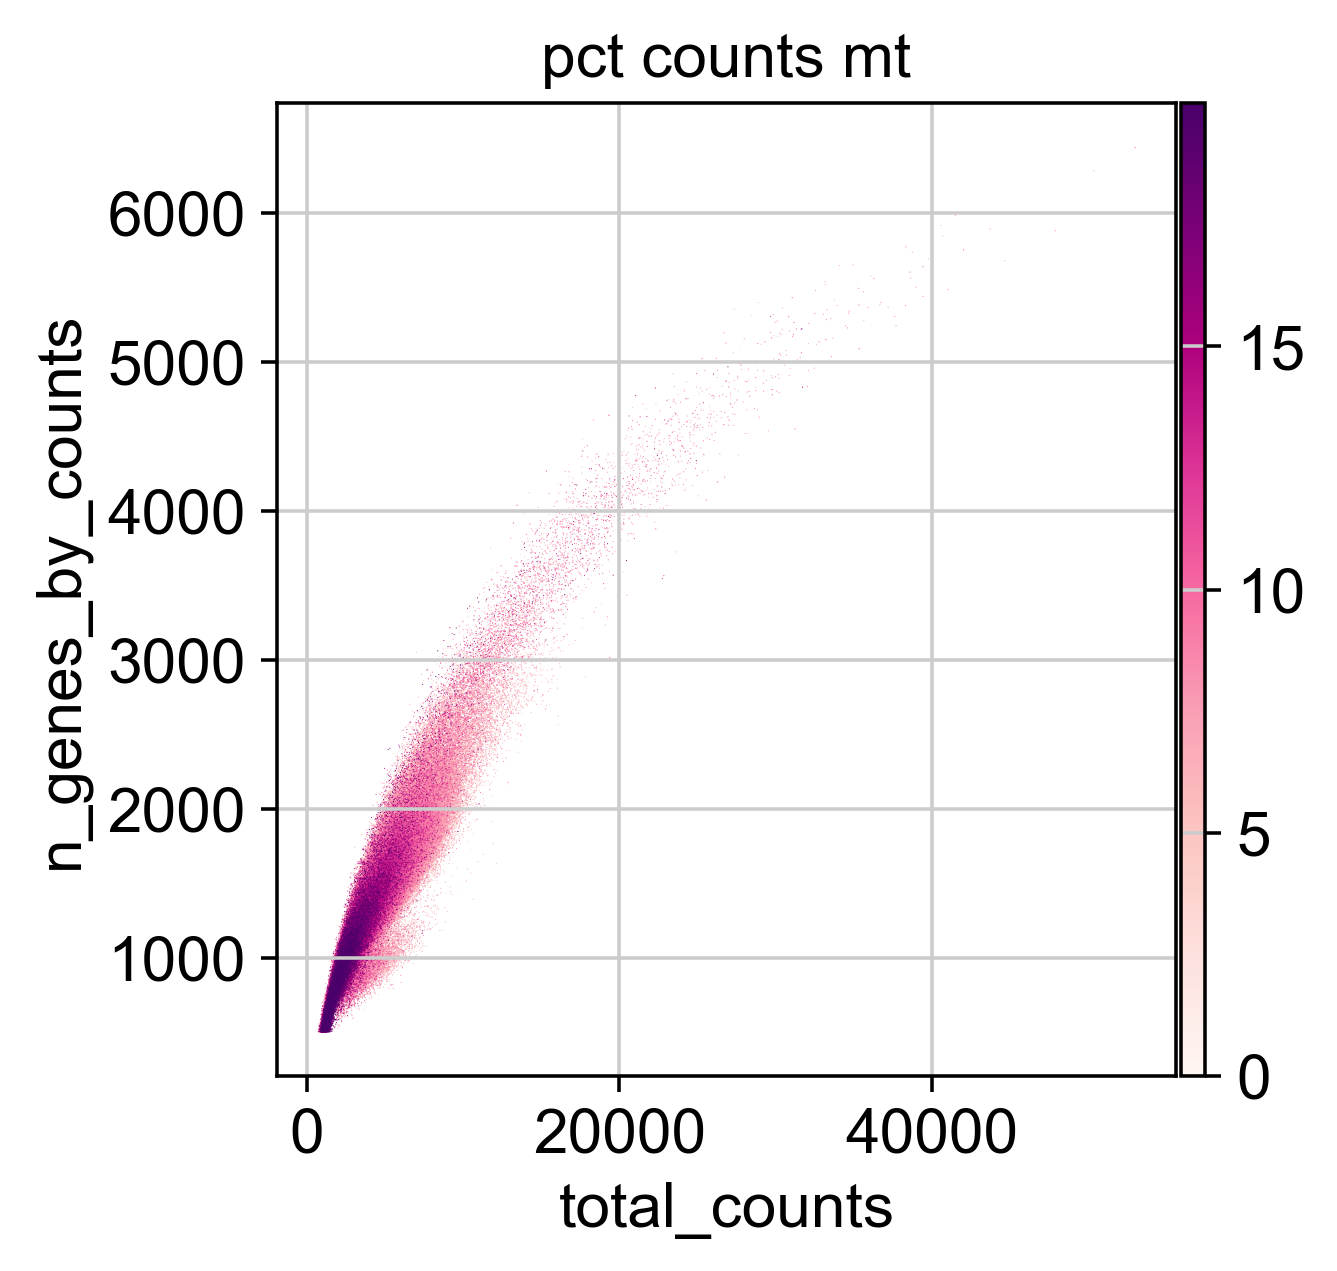

In [19]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

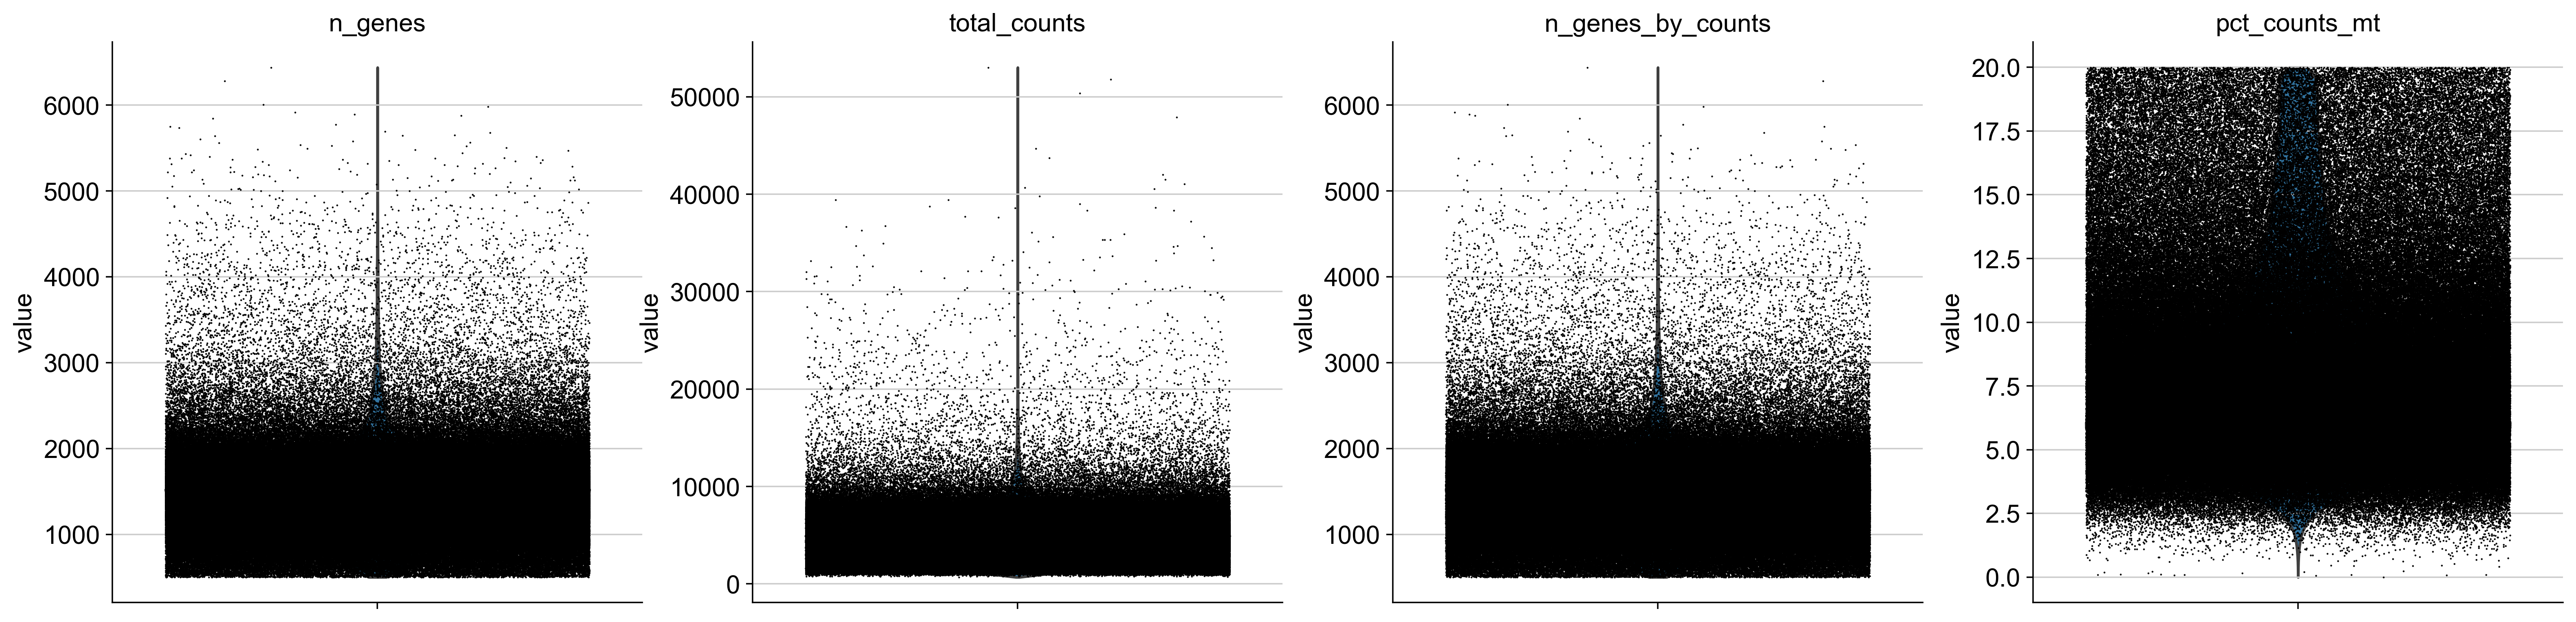

In [20]:
sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

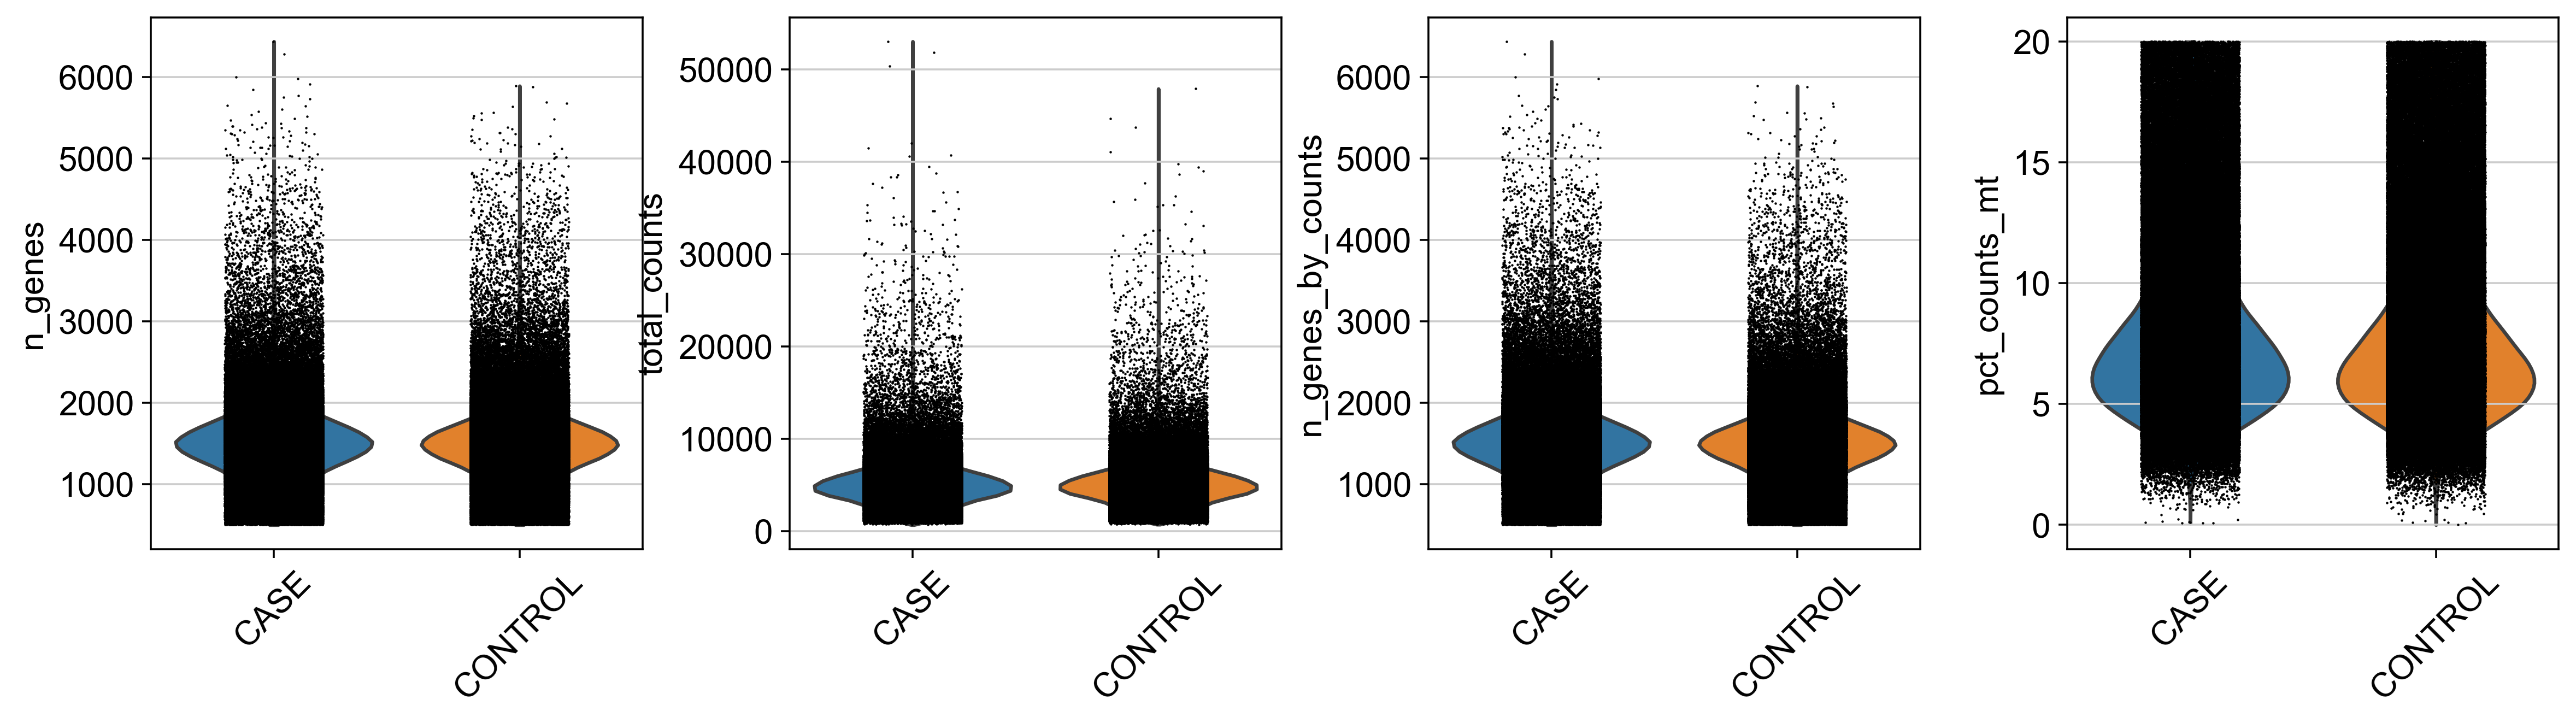

In [21]:
# Organized by disease status as sample size is too large to do by sample

sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt'],
             jitter = 0.2, groupby = 'TB_status', rotation = 45)

### QC-based filtering

In [23]:
sample_object.obs.head()

cell_id  nUMI  nGene  percent_mito  batch TB_status    UMAP_1  \
0  AAACCCAAGGCCTAAG-1  6108   1557      0.055828      1      CASE -2.743703   
1  AAACCCAAGGTTCTTG-1  7902   2149      0.083017      1      CASE -4.237045   
2  AAACCCAAGTGCAGGT-1  5033   1788      0.129744      1      CASE -1.136187   
3  AAACCCACAAGAGTAT-1  6574   1747      0.066930      1      CASE -1.015078   
4  AAACCCACACACGGTC-1  6471   1872      0.047442      1      CASE  0.658381   

     UMAP_2        cluster_name cluster_ids      donor  n_genes  \
0  1.617194          CD4+ CD27+         C-2  TB3419057     1557   
1  0.306832  CD4+ CCR4+ central         C-3  TB3419057     2149   
2 -4.012949           CD4+ Treg         C-9  TB3419057     1788   
3  3.789505    CD4+ CD27+CD161+         C-4  TB3419057     1747   
4  2.427080         CD4+ Th17/1        C-13  TB0610655     1872   

   n_genes_by_counts  total_counts  total_counts_mt  pct_counts_mt  
0               1557        6108.0            341.0       5.582842  
1               2149        7902.0            656.0       8.301696  
2               1788        5033.0            653.0      12.974369  
3               1747        6574.0            440.0       6.693033  
4               1872        6471.0            307.0       4.744244

In [24]:
sample_object.shape

(500089, 24000)

In [25]:
sample_object.obs["mt_ok"] = sample_object.obs['pct_counts_mt'] <= 20
sample_object.obs.head()


cell_id  nUMI  nGene  percent_mito  batch TB_status    UMAP_1  \
0  AAACCCAAGGCCTAAG-1  6108   1557      0.055828      1      CASE -2.743703   
1  AAACCCAAGGTTCTTG-1  7902   2149      0.083017      1      CASE -4.237045   
2  AAACCCAAGTGCAGGT-1  5033   1788      0.129744      1      CASE -1.136187   
3  AAACCCACAAGAGTAT-1  6574   1747      0.066930      1      CASE -1.015078   
4  AAACCCACACACGGTC-1  6471   1872      0.047442      1      CASE  0.658381   

     UMAP_2        cluster_name cluster_ids      donor  n_genes  \
0  1.617194          CD4+ CD27+         C-2  TB3419057     1557   
1  0.306832  CD4+ CCR4+ central         C-3  TB3419057     2149   
2 -4.012949           CD4+ Treg         C-9  TB3419057     1788   
3  3.789505    CD4+ CD27+CD161+         C-4  TB3419057     1747   
4  2.427080         CD4+ Th17/1        C-13  TB0610655     1872   

   n_genes_by_counts  total_counts  total_counts_mt  pct_counts_mt  mt_ok  
0               1557        6108.0            341.0       5.582842   True  
1               2149        7902.0            656.0       8.301696   True  
2               1788        5033.0            653.0      12.974369   True  
3               1747        6574.0            440.0       6.693033   True  
4               1872        6471.0            307.0       4.744244   True

In [26]:
sample_object.obs.mt_ok.value_counts()

mt_ok
True    500089
Name: count, dtype: int64

In [27]:
print(f"Total number of cells: {sample_object.n_obs}")
sample_object = sample_object[(sample_object.obs.mt_ok)].copy()

print(f"Number of cells after filtering of low quality cells: {sample_object.n_obs}")

Total number of cells: 500089
Number of cells after filtering of low quality cells: 500089


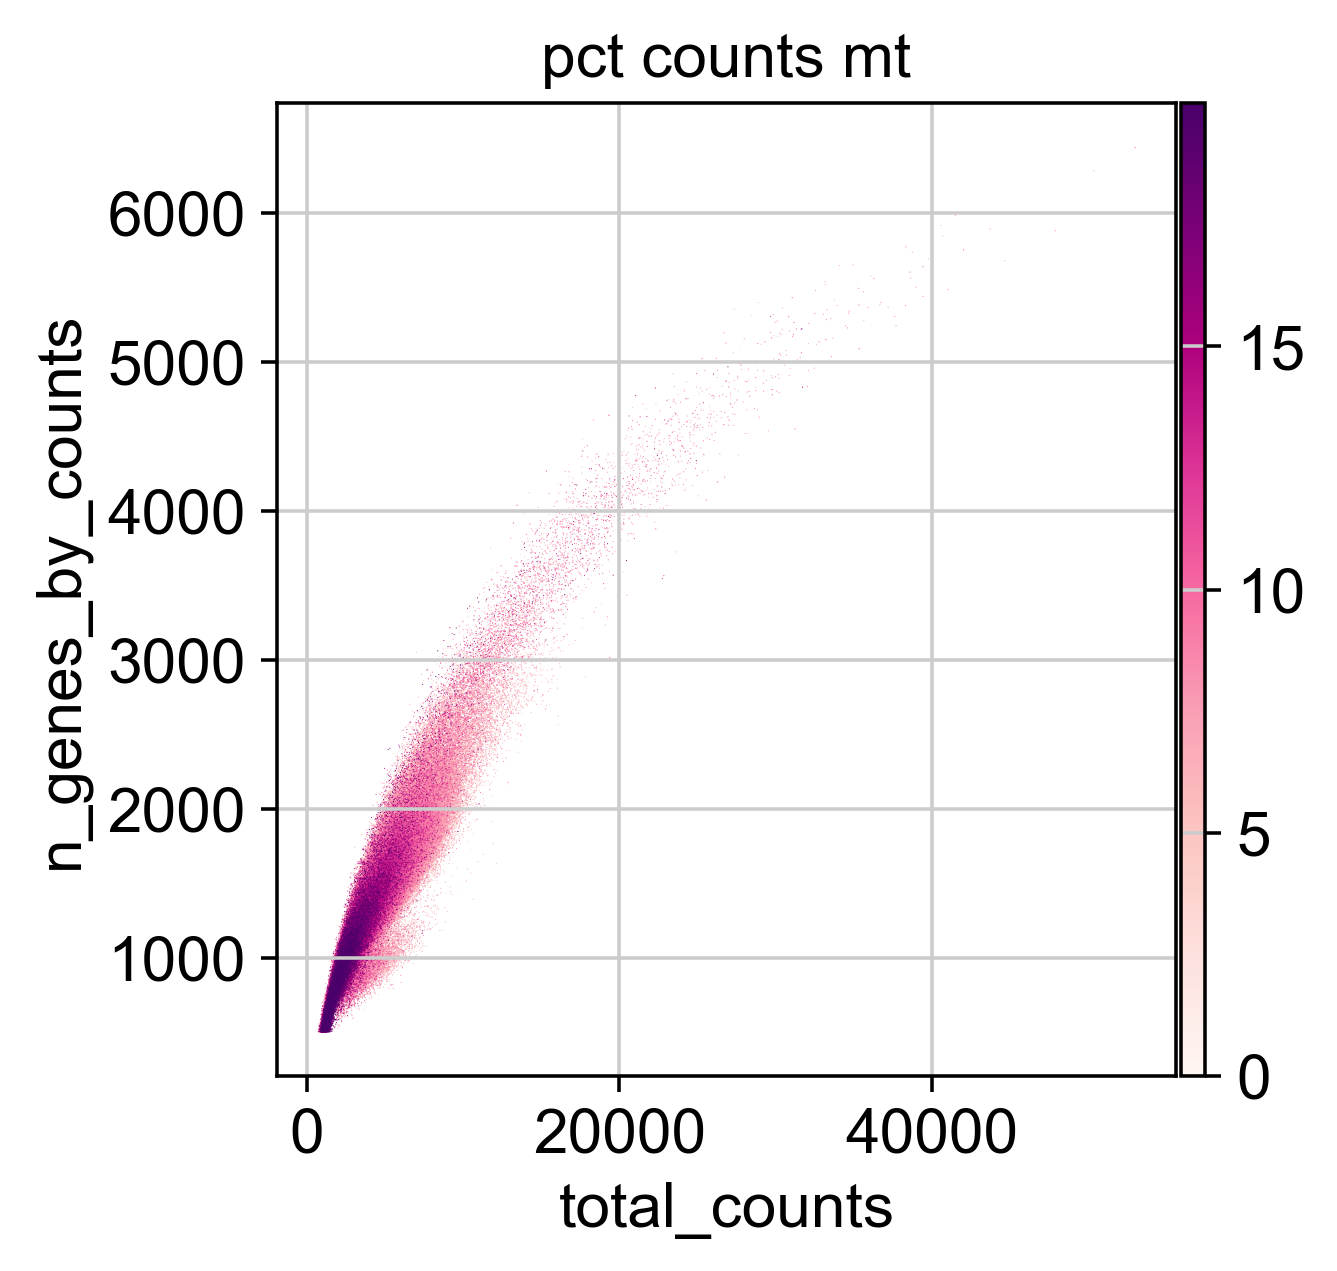

In [28]:
p1 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

### Add sample sex covariate

In [22]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [29]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

- Y chrom

In [30]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'PCDH11Y', 'USP9Y', 'DDX3Y',
       'UTY', 'TMSB4Y', 'NLGN4Y', 'FAM224B', 'TTTY14', 'KDM5D', 'TTTY10',
       'EIF1AY', 'RPS4Y2', 'PRY2', 'PRY'],
      dtype='object')

In [31]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

- X chrom

In [32]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['PLCXD1', 'GTPBP6', 'LINC00685', 'PPP2R3B', 'CRLF2', 'CSF2RA', 'IL3RA',
       'SLC25A6', 'LINC00106', 'ASMTL-AS1',
       ...
       'VBP1', 'RAB39B', 'CLIC2', 'F8A3', 'TMLHE-AS1', 'TMLHE', 'SPRY3',
       'VAMP7', 'IL9R', 'WASIR1'],
      dtype='object', length=653)

In [33]:
sample_object.obs['percent_chrX'] = np.sum(
    sample_object[:, chrX_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

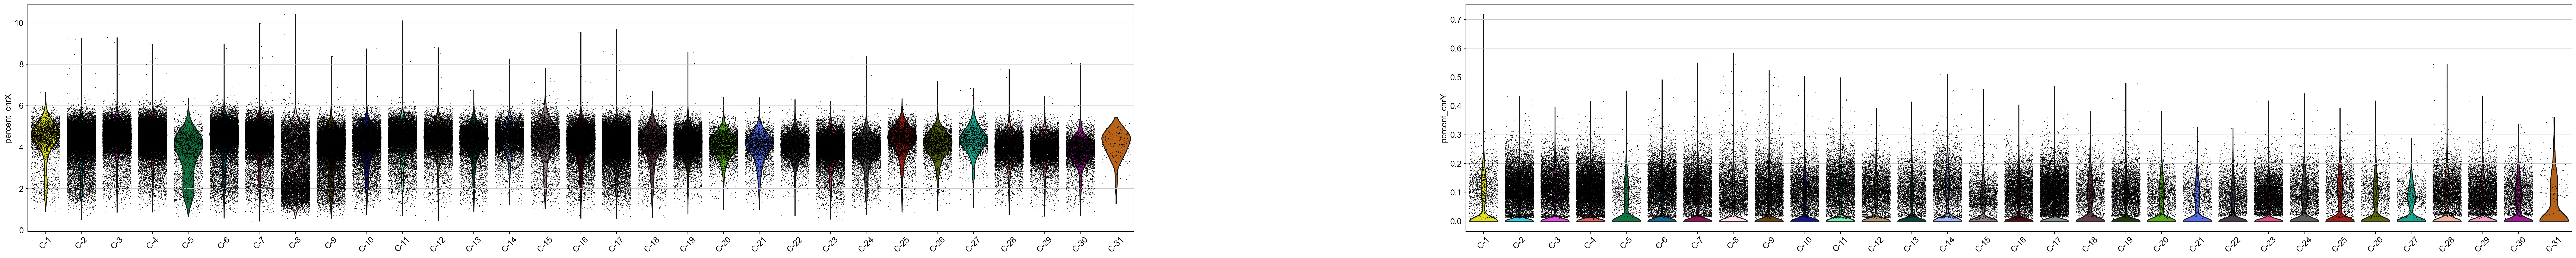

In [37]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(sample_object, ["percent_chrX", "percent_chrY"], jitter = 0.4, groupby = 'cluster_ids', rotation = 45)

### Calculate cell cycle scores

In [38]:
!if [ ! -f /Users/mairi.mcclean/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/cell_cycle_gene.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [39]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [40]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['TMSB4X', 'MALAT1', 'B2M', 'MT-CO1', 'MT-ATP6', 'MT-CO3']
    finished (0:00:03)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:09)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    641 total control genes are used. (0:00:08)
-->     'phase', cell cycle phase (adata.obs)


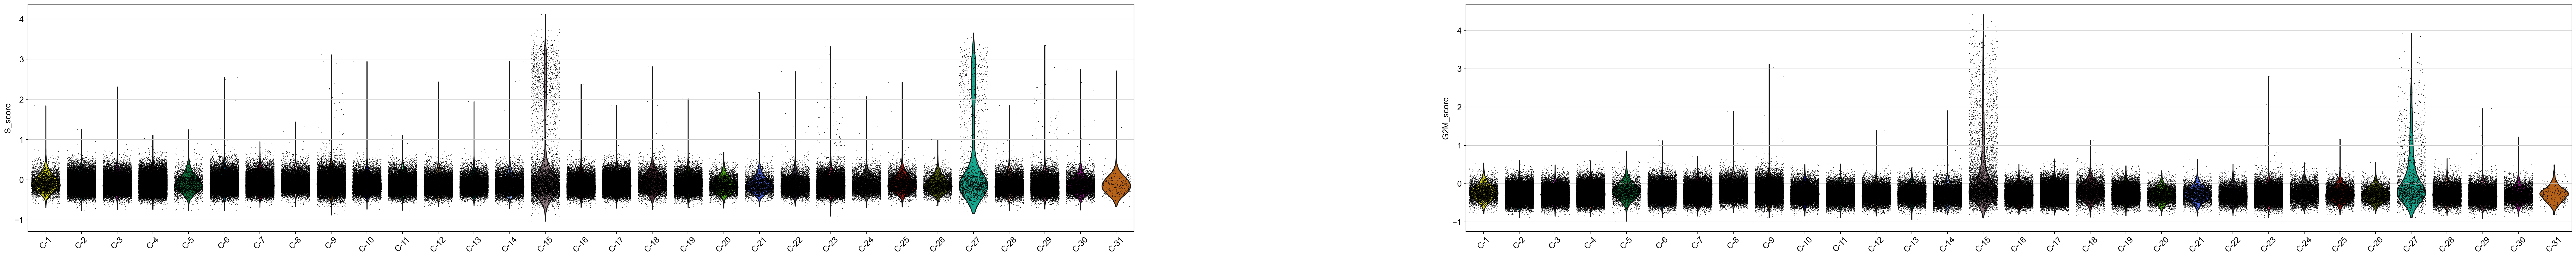

In [42]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'cluster_ids', rotation = 45)

In [43]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 500089 × 24000
    obs: 'cell_id', 'nUMI', 'nGene', 'percent_mito', 'batch', 'TB_status', 'UMAP_1', 'UMAP_2', 'cluster_name', 'cluster_ids', 'donor', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mt_ok', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score'
    var: 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'TB_status_colors', 'donor_colors', 'cluster_ids_colors'

### Predict doublets

In [ ]:
holder = np.zeros((sample_object.shape[0],))
for smp in np.unique(sample_object.obs['batch']):
    if smp == []:
        continue
    adata_smp = sample_object[sample_object.obs['batch'] == smp]
    scrub = scr.Scrublet(adata_smp.X)
    adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
    holder[sample_object.obs['batch'] == smp] = adata_smp.obs['predicted_doublets']
sample_object.obs['predicted_doublets'] = holder

sum(sample_object.obs['predicted_doublets'])
sample_object

In [ ]:
scrub.plot_histogram()

In [ ]:
#check if our predicted doublets also have more detected genes in general; what would be the number required to raise suspicions?

sc.pl.violin(sample_object, ['n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'predicted_doublets'],
             jitter = 0.2, groupby = 'TB_status', rotation = 45)

### Prepare counts for individual slots

In [ ]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

### Export object

In [ ]:
sample_object.write('/Volumes/LaCie/data_lake/Mairi_example/processed_files/abridged_qc/human/Nathan2021_citeseq_PBMC_mm_230306_qcd.h5ad')
